In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [154]:
df=pd.read_csv("Regression with multi variable.txt", header=None , names=["size","pedroom","price"])
df

,size,pedroom,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900
5,1985,4,299900
6,1534,3,314900
7,1427,3,198999
8,1380,3,212000
9,1494,3,242500


In [155]:
df2=(df-df.mean())/df.std() # RESCALING
df2

,size,pedroom,price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389
5,-0.019732,1.090417,-0.323998
6,-0.587240,-0.223675,-0.204036
7,-0.721881,-0.223675,-1.130948
8,-0.781023,-0.223675,-1.026973
9,-0.637573,-0.223675,-0.783051


In [156]:
df2.insert(0,"ones",1)
df.insert(0,"ones",1)

In [157]:
x=df2.iloc[:,0:df2.shape[1]-1]
y=df2.iloc[:,df2.shape[1]-1:]
x = np.matrix(x.values)
y = np.matrix(y.values)
theta = np.matrix(np.zeros((1,df2.shape[1]-1)))
theta

matrix([[0., 0., 0.]])

In [158]:
def costFunction(X,Y,theta): 
    z=np.power(((X* theta.T)-Y),2)
    return sum(z)/(2*X.shape[0])

In [159]:
alpha=.1
iters=100
g,cost=gradientDescent(x,y,theta,alpha,iters)
print(g)

[[-1.11258520e-16  8.79020847e-01 -4.74337322e-02]]


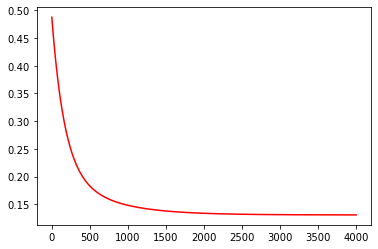

In [112]:
plt.plot(np.arange(iters), cost, 'r')

[[-1.11258520e-16  8.79020847e-01 -4.74337322e-02]]


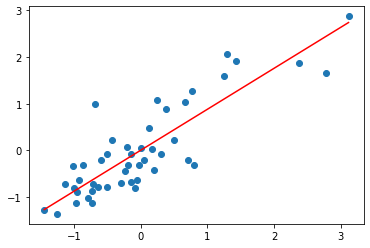

In [181]:
line=np.linspace(df2["size"].min(),df2["size"].max(),100)
print(g)
equation=g[0,0]+(g[0,1]*line)
plt.plot(line, equation, 'r', label='Prediction')
plt.scatter(df2["size"], df2["price"], label='Traning Data')

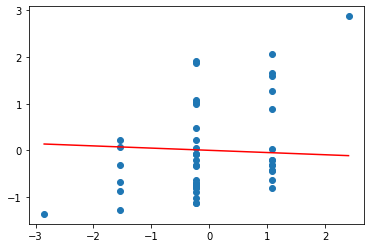

In [188]:
line2 = np.linspace(df2.pedroom.min(), df2.pedroom.max(), 100)
f = g[0, 0] + (g[0, 2] * line2)
plt.plot(line2, f, 'r', label='Prediction')
plt.scatter(df2.pedroom, df2.price, label='Traning Data')